# Sensitivity analysis of the glyoxalase system of *L. infantum*

### Part of the publication

Sousa Silva, M. , Ferreira, A.E.N., Tomás, A.M., Cordeiro, C., Ponces Freire, A. (2005)  Quantitative assessment of the glyoxalase pathway in Leishmania infantum as a therapeutic target by modelling and computer simulation. *FEBS Journal* **272(10)**: 2388-2398.

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as pl
import numpy as np

from stimator import read_model, Solutions

### The kinetic model:

![Glyoxalases](images/glos_leish.png)

- n.e. - non-enzymatic reactions (triose-phosphates degradation and hemithioacetal adduct formation)
- GLX I - glyoxalase I
- GLX II - glioxalase II

### Componentes:

- Formação não enzimática de metilglioxal (MG) a partir dos fosfatos de triose da glicólise
- Conjugação não enzimática (e reversível) com tripanotiono (T(SH)2)
- Ação enzimática de Glioxalase I e de Glioxalase II, regenerando o tripanotiono e formando D-lactato.


### Goal:

Prever se algumas modificações experimentais da via

- inibições de enzimas
- aumento da formação de MG
- interferência com a biosíntese de tiois

poderá **aumentar** o estado estacionário de metilglioxal em células de *L. infantum*.


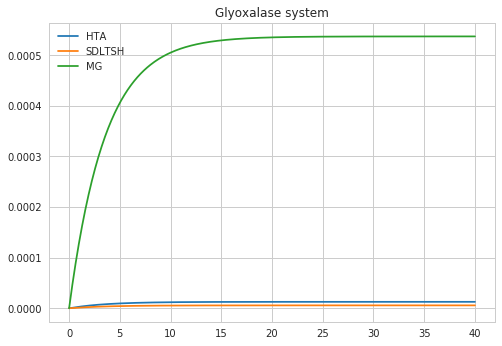

In [4]:
m = read_model("""
title Glyoxalase system

vgen       : -> MG,            k1 * GAP + k2 * DHAP
vconj      : MG + TSH2 -> HTA, k3 * MG * TSH2 - k4 * HTA
vglo1      : HTA -> SDLTSH,    Vglo1 * HTA / (Kmglo1 + HTA)
vglo2      : SDLTSH -> TSH2,   Vglo2 * SDLTSH  / (Kmglo2 + SDLTSH)

k1          = 6.4e-3          # min-1
k2          = 6.6e-4          # min-1
GAP         = 0.0072          # mM
DHAP        = 0.16            # mM

k3          = 0.34            # mM-1 min-1
k4          = 1.01            # min-1

Vglo1       = 2 * 3.042       # mM min-1
Vglo2       = 2 * 2.653       # mM min-1
Kmglo1      = 2 * 0.253       # mM
Kmglo2      = 2 * 0.0980      # mM

init: (TSH2 = 2 * 0.45)
!! HTA SDLTSH MG
""")

m.solve(tf=40.0).plot()

Para avaliar o efeito do aumento do geração não enzimática de MG, introduzimos no modelo um factor, `fgen`, inicialmente igual a 1, que expressa variações relativas na velocidade `vgen` (considerada constante durante uma simulação).

Desta forma podemos executar uma série de simulações para diferentes valores de `fgen`:

fgen MG
1 0.00053731963007
2 0.00107467555788
3 0.00161205756565
4 0.00214946306601


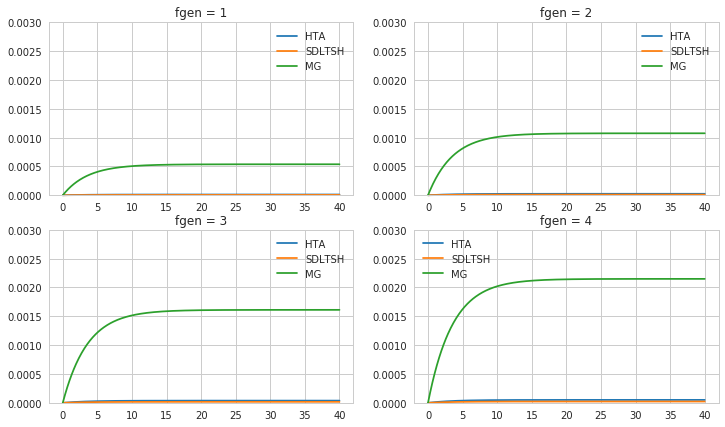

In [6]:
m_fgen = read_model("""
title Glyoxalase system

vgen       : -> MG,            fgen * k1 * GAP + fgen * k2 * DHAP
vconj      : MG + TSH2 -> HTA, k3 * MG * TSH2 - k4 * HTA
vglo1      : HTA -> SDLTSH,    Vglo1 * HTA / (Kmglo1 + HTA)
vglo2      : SDLTSH -> TSH2,   Vglo2 * SDLTSH  / (Kmglo2 + SDLTSH)

fgen        = 1
k1          = 6.4e-3          # min-1
k2          = 6.6e-4          # min-1
GAP         = 0.0072          # mM
DHAP        = 0.16            # mM

k3          = 0.34            # mM-1 min-1
k4          = 1.01            # min-1

Vglo1       = 2 * 3.042       # mM min-1
Vglo2       = 2 * 2.653       # mM min-1
Kmglo1      = 2 * 0.253       # mM
Kmglo2      = 2 * 0.0980      # mM
totalSH     = 2 * 0.45
init: (TSH2 = 2 * 0.45)
!! HTA SDLTSH MG
""")

sols = Solutions()

print ('fgen MG')

for fgen in 1, 2, 3, 4:
    m_fgen.parameters.fgen = fgen
    
    s = m_fgen.solve(tf=40.0)
    print (fgen, s.last['MG'])
    sols += s

sols.plot(fig_size=(12,7), yrange=(0,0.003), titles = ['fgen = %g' % fgen for fgen in (1, 2, 3, 4)])

m_fgen.parameters.fgen = 1

A concentração "final" (estado estacionário) de MG parece ser proporcional a `fgen`.

Podemos aplicar a mesma técnica e avaliar o efeito de se variar:

- a formação não enzimática de MG (`fgen`)
- a atividade de GLO I (`fglo1`)
- a atividade de GLO II (`fglo2`)
- a concentração **total** de tiois, HTA + TSH2 + SDLTSH (`fSH`)

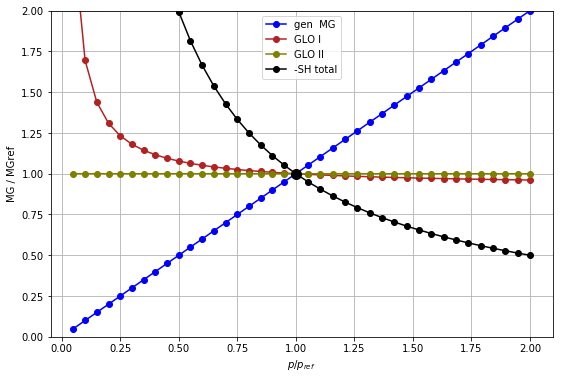

In [8]:
m_fs = read_model("""
title Glyoxalase system

vgen       : -> MG,            fgen * k1 * GAP + fgen * k2 * DHAP
vconj      : MG + TSH2 -> HTA, k3 * MG * TSH2 - k4 * HTA
vglo1      : HTA -> SDLTSH,    fglo1 * Vglo1 * HTA / (Kmglo1 + HTA)
vglo2      : SDLTSH -> TSH2,   fglo2 * Vglo2 * SDLTSH  / (Kmglo2 + SDLTSH)

fgen        = 1
fglo1       = 1
fglo2       = 1
fSH         = 1

k1          = 6.4e-3          # min-1
k2          = 6.6e-4          # min-1
GAP         = 0.0072          # mM
DHAP        = 0.16            # mM

k3          = 0.34            # mM-1 min-1
k4          = 1.01            # min-1

Vglo1       = 2 * 3.042       # mM min-1
Vglo2       = 2 * 2.653       # mM min-1
Kmglo1      = 2 * 0.253       # mM
Kmglo2      = 2 * 0.0980      # mM

init: (TSH2 = 2 * 0.45)
!! HTA SDLTSH MG
""")

MG_ref = m_fs.solve(tf=40.0).last['MG']

ratios = np.concatenate((np.linspace(0.05, 1, 20), np.linspace(1, 2, 20)))

s = m_fs.scan({'fgen':ratios}, tf=40.0)
MGs_gen = [solution.last['MG'] / MG_ref for solution in s]

s = m_fs.scan({'fglo1':ratios}, tf=40.0)
MGs_glo1 = [solution.last['MG'] / MG_ref for solution in s]
    
s = m_fs.scan({'fglo2':ratios}, tf=40.0)
MGs_glo2 = [solution.last['MG'] / MG_ref for solution in s]

ratiosSH = m_fs.init.TSH2 * ratios
s = m_fs.scan({'init.TSH2':ratiosSH}, tf=40.0)
MGs_SH = [solution.last['MG'] / MG_ref for solution in s]

pl.subplots(figsize=(9,6))
pl.plot(ratios, MGs_gen,  color='blue', label="gen  MG", marker='o')
pl.plot(ratios, MGs_glo1, color='firebrick', label="GLO I", marker='o')
pl.plot(ratios, MGs_glo2, color='olive', label="GLO II", marker='o')
pl.plot(ratios, MGs_SH,   color='black', label="-SH total", marker='o')
pl.xlabel("$p/p_{ref}$")
pl.plot([1],[1], 'ko', ms=10)
pl.ylim(0,2)
pl.legend(loc='upper center')
pl.ylabel("MG / MGref")
pl.grid()